In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import scipy.stats as stats

In [2]:
# read in data file
readcsv = pd.read_csv("Data.csv")
readcsv.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15


In [3]:
sandbox = readcsv.copy()

In [4]:
# filter out rows with no listing price
sandbox.drop(sandbox[sandbox["Listing Price"] == 0].index, inplace = True)

In [5]:
# filter out rows with no reviews
sandbox.drop(sandbox[sandbox["Reviews"] == 0].index, inplace = True)
len(sandbox)

2752

In [6]:
# filter out rows with no ratings
sandbox.drop(sandbox[sandbox["Rating"] == 0].index, inplace = True)
len(sandbox)

2680

In [7]:
sandbox.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15


In [8]:
#add columns for Adidas/Nike distinction and gender market
sandbox['True_Brand']= ""
sandbox['Gender'] = ""
sandbox.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited,True_Brand,Gender
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14,,
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15,,
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15,,
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15,,
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15,,


In [9]:
#finding array of unique brands (justifying our Nike or Adidas logic)
sandbox["Brand"].unique()

array(['Adidas Adidas ORIGINALS', 'Adidas ORIGINALS', 'Adidas CORE / NEO',
       'Adidas SPORT PERFORMANCE', 'Nike'], dtype=object)

In [10]:
#loop through rows to create binary Nike/ Adidas column
# for index, row in sandbox.iterrows():
#     try:
        
        
for index, row in sandbox.iterrows():
    Brand_Name = row["Brand"]
    
    if Brand_Name == 'Nike':
        sandbox.loc[[index], "True_Brand"]= "Nike"
    else:
        sandbox.loc[[index], "True_Brand"]= "Adidas"
sandbox

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited,True_Brand,Gender
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14,Adidas,
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15,Adidas,
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15,Adidas,
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15,Adidas,
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15,Adidas,
...,...,...,...,...,...,...,...,...,...,...,...,...
3248,Nike Zoom Pegasus Turbo XX,AR4347-600,16995,13597,0,Nike,"Bridging performance and style, the Nike Zoom ...",1.0,1,2020-04-13T15:38:54,Nike,
3255,Nike Zoom Pegasus Turbo 2 Special Edition,BV7757-500,15995,12797,0,Nike,The Nike Zoom Pegasus Turbo 2 is updated with ...,5.0,1,2020-04-13T15:39:05,Nike,
3261,Kyrie 6 'Enlightenment',BQ4630-500,10995,8797,0,Nike,"In spiritual circles, the colour purple repres...",4.4,10,2020-04-13T15:40:56,Nike,
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,The Air Jordan 8 Retro recaptures the memorabl...,5.0,1,2020-04-13T15:41:01,Nike,


In [11]:
#Do the same thing for gender
# sandbox.loc[[index], "True_Brand"]= "Nike"

for index, row in sandbox.iterrows():
    #sandbox['Product_Name'] = row["Product_Name"]
    if row["Product Name"].lower().find("women")!= -1:
        sandbox.loc[index, "Gender"]= "Women"
    elif row["Product Name"].lower().find("men")!= -1:
        sandbox.loc[index, "Gender"]= "Men"
    elif row["Product Name"].lower().find("unisex")!= -1:
        sandbox.loc[index, "Gender"]= "Unisex"      

    elif row["Description"].lower().find("women")!= -1:
        sandbox.loc[index, "Gender"]= "Women"
    elif row["Description"].lower().find("men")!= -1:
        sandbox.loc[index, "Gender"]= "Men"
    elif row["Description"].lower().find("unisex")!= -1:
        sandbox.loc[index, "Gender"]= "Unisex"      
    else:
        sandbox.loc[index, "Gender"]= "Unknown"
sandbox["Gender"].unique()

array(['Women', 'Men', 'Unisex', 'Unknown'], dtype=object)

In [12]:
# Avergae Adidas shoe rating
adi_rtng_df = sandbox.loc[sandbox["True_Brand"] == "Adidas"]
adi_rtng = adi_rtng_df["Rating"].mean()
adi_rtng

3.4637227722772277

In [13]:
# Average Nike shoe rating
nike_rtng_df = sandbox.loc[sandbox["True_Brand"] == "Nike"]
nike_rtng = nike_rtng_df["Rating"].mean()
nike_rtng

4.12774193548387

In [14]:
# Adidas men's average shoe rating 
adi_rtng_man_df = sandbox.loc[sandbox["Gender"] == "Men"]
adi_rtng_man_df = adi_rtng_man_df.loc[sandbox["True_Brand"] == "Adidas"]
adi_rtng_man = adi_rtng_man_df["Rating"].mean()
adi_rtng_man

3.459486873508353

In [15]:
# Adidas women's average shoe rating 
adi_rtg_women_df = sandbox.loc[sandbox["Gender"] == "Women"]
adi_rtg_women_df = adi_rtg_women_df.loc[sandbox["True_Brand"] == "Adidas"]
adi_rtg_women = adi_rtg_women_df["Rating"].mean()
adi_rtg_women

3.4745672436751

In [16]:
# Adidas unisex average shoe rating 
adi_rtg_uni_df = sandbox.loc[sandbox["Gender"] == "Unisex"]
adi_rtg_uni_df = adi_rtg_uni_df.loc[sandbox["True_Brand"] == "Adidas"]
adi_rtg_uni = adi_rtg_uni_df["Rating"].mean()
adi_rtg_uni

3.4731958762886603

In [17]:
# Adidas unknown gender average shoe rating (adidas has one shoe in this category)
adi_rtg_unkn_df = sandbox.loc[sandbox["Gender"] == "Unknown"]
adi_rtg_unkn_df = adi_rtg_unkn_df.loc[sandbox["True_Brand"] == "Adidas"]
adi_rtg_unkn = adi_rtg_unkn_df["Rating"].mean()
adi_rtg_unkn

1.5

In [18]:
# Nike men's average shoe rating 
nike_rtng_man_df = sandbox.loc[sandbox["Gender"] == "Men"]
nike_rtng_man_df = nike_rtng_man_df.loc[sandbox["True_Brand"] == "Nike"]
nike_rtng_man = nike_rtng_man_df["Rating"].mean()
nike_rtng_man

4.141935483870968

In [19]:
# Nike women's average shoe rating 
nike_rtng_woman_df = sandbox.loc[sandbox["Gender"] == "Women"]
nike_rtng_woman_df = nike_rtng_woman_df.loc[sandbox["True_Brand"] == "Nike"]
nike_rtng_woman = nike_rtng_woman_df["Rating"].mean()
nike_rtng_woman

3.766666666666667

In [20]:
# Nike unisex average shoe rating 
nike_rtg_uni_df = sandbox.loc[sandbox["Gender"] == "Unisex"]
nike_rtg_uni_df = nike_rtg_uni_df.loc[sandbox["True_Brand"] == "Nike"]
# nike_rtg_uni_df
nike_rtg_uni = nike_rtg_uni_df["Rating"].mean()
nike_rtg_uni

nan

In [21]:
# Nike unknown gender average shoe rating (adidas has one shoe in this category)
nike_rtg_unkn_df = sandbox.loc[sandbox["Gender"] == "Unknown"]
nike_rtg_unkn_df = nike_rtg_unkn_df.loc[sandbox["True_Brand"] == "Nike"]
nike_rtg_unkn = nike_rtg_unkn_df["Rating"].mean()
nike_rtg_unkn

4.1625000000000005

In [22]:
# use REGEX to find Women's product 
# sandbox.loc[sandbox["Product Name"].str.contains("women", case=False),:]

In [23]:
# Create Average shoe rating for each brand by gender; total, men, women, unisex, unknown
# ADIDAS: Total, Men, Women, Uni, Unknown------------------------------------------------
adi_rtng_df = sandbox.loc[sandbox["True_Brand"] == "Adidas"]
adi_rtng = adi_rtng_df["Rating"].mean()
adi_rtng_man_df = sandbox.loc[sandbox["Gender"] == "Men"]
adi_rtng_man_df = adi_rtng_man_df.loc[sandbox["True_Brand"] == "Adidas"]
adi_rtng_man = adi_rtng_man_df["Rating"].mean()
adi_rtg_women_df = sandbox.loc[sandbox["Gender"] == "Women"]
adi_rtg_women_df = adi_rtg_women_df.loc[sandbox["True_Brand"] == "Adidas"]
adi_rtg_women = adi_rtg_women_df["Rating"].mean()
adi_rtg_uni_df = sandbox.loc[sandbox["Gender"] == "Unisex"]
adi_rtg_uni_df = adi_rtg_uni_df.loc[sandbox["True_Brand"] == "Adidas"]
adi_rtg_uni = adi_rtg_uni_df["Rating"].mean()
adi_rtg_unkn_df = sandbox.loc[sandbox["Gender"] == "Unknown"]
adi_rtg_unkn_df = adi_rtg_unkn_df.loc[sandbox["True_Brand"] == "Adidas"]
adi_rtg_unkn = adi_rtg_unkn_df["Rating"].mean()
# NIKE: Total, men, women, Uni, Unknown---------------------------------------------------
nike_rtng_df = sandbox.loc[sandbox["True_Brand"] == "Nike"]
nike_rtng = nike_rtng_df["Rating"].mean()
nike_rtng_man_df = sandbox.loc[sandbox["Gender"] == "Men"]
nike_rtng_man_df = nike_rtng_man_df.loc[sandbox["True_Brand"] == "Nike"]
nike_rtng_man = nike_rtng_man_df["Rating"].mean()
nike_rtng_woman_df = sandbox.loc[sandbox["Gender"] == "Women"]
nike_rtng_woman_df = nike_rtng_woman_df.loc[sandbox["True_Brand"] == "Nike"]
nike_rtng_woman = nike_rtng_woman_df["Rating"].mean()
nike_rtg_uni_df = sandbox.loc[sandbox["Gender"] == "Unisex"]
nike_rtg_uni_df = nike_rtg_uni_df.loc[sandbox["True_Brand"] == "Nike"]
nike_rtg_uni = nike_rtg_uni_df["Rating"].mean()
nike_rtg_unkn_df = sandbox.loc[sandbox["Gender"] == "Unknown"]
nike_rtg_unkn_df = nike_rtg_unkn_df.loc[sandbox["True_Brand"] == "Nike"]
nike_rtg_unkn = nike_rtg_unkn_df["Rating"].mean()

Text(0.5, 1.0, 'Adidas vs. Nike: avg product rating by gender')

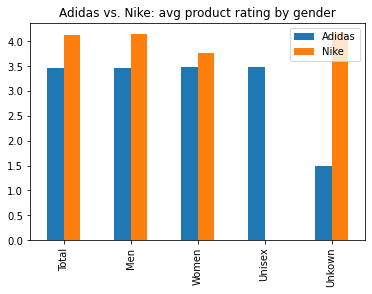

In [24]:
# Plot Nike vs. Adidas by gender
ratingsplotdata = pd.DataFrame(
    {"Adidas": [adi_rtng, adi_rtng_man, adi_rtg_women, adi_rtg_uni, adi_rtg_unkn],
    "Nike": [nike_rtng, nike_rtng_man, nike_rtng_woman, nike_rtg_uni, nike_rtg_unkn]}, 
    index=["Total", "Men", "Women", "Unisex", "Unkown"])
# Plot a bar chart
ratingsplotdata.plot(kind="bar")
plt.title("Adidas vs. Nike: avg product rating by gender")

In [25]:
# add columns for Listing Price $, Sale Price $, and Discount $ 
sandbox["Listing Price $"]= ""
sandbox["Sale Price $"]= ""
sandbox["Discount $"]= ""
sandbox.head()


,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited,True_Brand,Gender,Listing Price $,Sale Price $,Discount $
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14,Adidas,Women,,,
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15,Adidas,Women,,,
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15,Adidas,Women,,,
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15,Adidas,Women,,,
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15,Adidas,Women,,,


In [53]:
# populate columns for Listing Price $, Sale Price $, and Discount $ 
for row in sandbox:
    sandbox["Listing Price $"] = sandbox["Listing Price"]/100
    sandbox["Sale Price $"] = sandbox["Sale Price"]/100
    discount = sandbox["Listing Price $"] - sandbox["Sale Price $"]
    sandbox["Discount $"] = discount
#sandbox.head()    
sandbox

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited,True_Brand,Gender,Listing Price $,Sale Price $,Discount $
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14,Adidas,Women,149.99,74.99,75.00
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15,Adidas,Women,75.99,37.99,38.00
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15,Adidas,Women,9.99,5.99,4.00
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15,Adidas,Women,69.99,34.99,35.00
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15,Adidas,Women,79.99,39.99,40.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,Nike Zoom Pegasus Turbo XX,AR4347-600,16995,13597,0,Nike,"Bridging performance and style, the Nike Zoom ...",1.0,1,2020-04-13T15:38:54,Nike,Women,169.95,135.97,33.98
3255,Nike Zoom Pegasus Turbo 2 Special Edition,BV7757-500,15995,12797,0,Nike,The Nike Zoom Pegasus Turbo 2 is updated with ...,5.0,1,2020-04-13T15:39:05,Nike,Unknown,159.95,127.97,31.98
3261,Kyrie 6 'Enlightenment',BQ4630-500,10995,8797,0,Nike,"In spiritual circles, the colour purple repres...",4.4,10,2020-04-13T15:40:56,Nike,Men,109.95,87.97,21.98
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,The Air Jordan 8 Retro recaptures the memorabl...,5.0,1,2020-04-13T15:41:01,Nike,Unknown,159.95,127.97,31.98


In [31]:
# Discount Comparison
# MSRP = []
# SalePrice = []
# MSRP_Rounded = []
# SalePrice_Rounded = []
# for price in sandbox["Listing Price"]:
#     MSRP.append(sandbox["Listing Price"]/100)
#     MSRP_Rounded.append(round(sandbox["Listing Price"]/100,0))
# plt.hist(MSRP_Rounded, )
# plt.show()

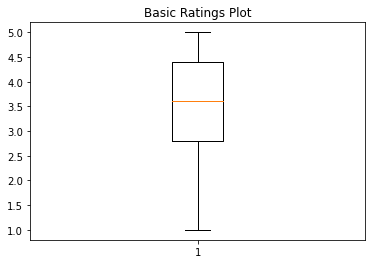

In [33]:
#Create Box Plots

fig1, ax1 = plt.subplots()
ax1.set_title('Basic Ratings Plot')
ax1.boxplot(sandbox["Rating"])
plt.show()

<AxesSubplot:title={'center':'Rating'}, xlabel='True_Brand'>

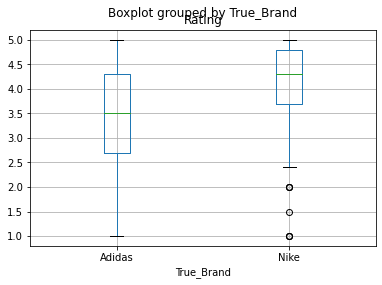

In [34]:
# Create Box Plots - PANDAS
sandbox.boxplot("Rating", "True_Brand")

In [41]:
#Independent T Test
rating_adidas = sandbox.loc[sandbox["True_Brand"]=="Adidas"]
rating_nike = sandbox.loc[sandbox["True_Brand"]== "Nike"]
stats.ttest_ind(rating_adidas["Rating"], rating_nike["Rating"], equal_var=False)
#rating_adidas

Ttest_indResult(statistic=-9.181162235290103, pvalue=9.538449921033955e-17)

<AxesSubplot:>

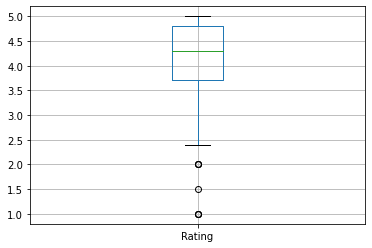

In [44]:
rating_nike.boxplot("Rating")


<AxesSubplot:title={'center':'Rating'}, xlabel='Gender'>

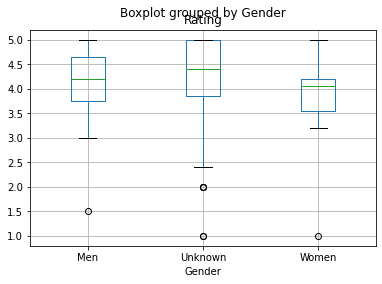

In [46]:
rating_nike.boxplot("Rating", "Gender")

<AxesSubplot:>

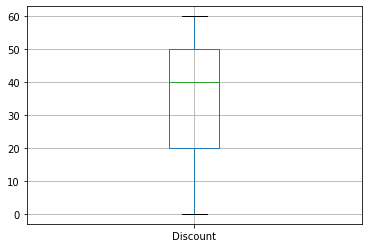

In [52]:
rating_adidas.boxplot("Discount")

<AxesSubplot:>

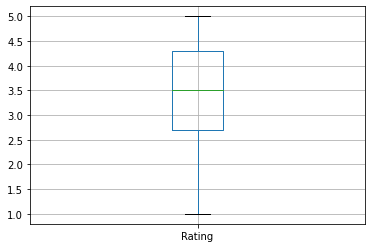

In [45]:
rating_adidas.boxplot("Rating")

<AxesSubplot:title={'center':'Rating'}, xlabel='Gender'>

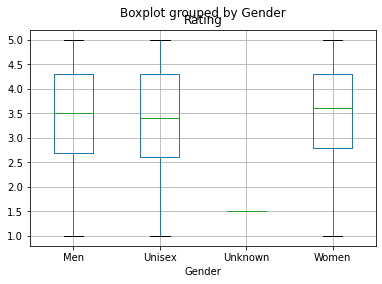

In [48]:
rating_adidas.boxplot("Rating", "Gender")